### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?


### Visualizing models over variables

In [47]:
%matplotlib inline|

In [74]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [75]:
# do we want to optimize this model for precision or recall???
# recall = # of 1s predicted correctly / 1s that you predicted 
# precision = # of 1s that you predicted

df.head()

# data dictionary = mostly categorical variables

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [76]:
# these are all joined on the index value 
# if you want to join on multiple data sources, you'll have to use a merge -- then it becomes tricky with 
# ...understanding which column to merge on 

df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in df.columns if 'dow_' in i]

In [77]:
df[features].head()

print features

['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7']


In [78]:
df.shape

(458311, 37)

In [79]:
features += ['CRS_DEP_TIME']

# they are trying to see--based on the day of the week, is there a greater likelihood of a flight being delayed?
model.fit(df[features[1:]], df['DEP_DEL15'])

# this is predicting a probability instead of a class
df['probability'] = model.predict_proba(df[features[1:]]).T[1]

In [80]:
df[features[1:]].head()

,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7,CRS_DEP_TIME
0,0,0,1,0,0,0,900
1,0,0,1,0,0,0,900
2,0,0,1,0,0,0,1230
3,0,0,1,0,0,0,1220
4,0,0,1,0,0,0,1305


In [81]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,carrier_VX,carrier_WN,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7,probability
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0,0,0,0,0,1,0,0,0,0.129193
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0,0,0,0,0,1,0,0,0,0.129193
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0,0,0,0,0,1,0,0,0,0.158102
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0,0,0,0,0,1,0,0,0,0.157153
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,...,0,0,0,0,0,1,0,0,0,0.165363


In [82]:
model.predict_proba(df[features[1:]])

array([[ 0.8708075 ,  0.1291925 ],
       [ 0.8708075 ,  0.1291925 ],
       [ 0.84189818,  0.15810182],
       ..., 
       [ 0.86784638,  0.13215362],
       [ 0.86411643,  0.13588357],
       [ 0.85900557,  0.14099443]])

In [83]:
model.predict_proba(df[features[1:]]).T[1]

array([ 0.1291925 ,  0.1291925 ,  0.15810182, ...,  0.13215362,
        0.13588357,  0.14099443])

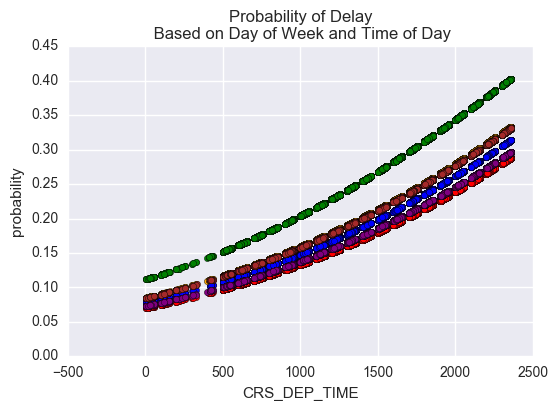

In [84]:
ax = plt.subplot(111)
colors = ['green', 'blue', 'red', 'purple', 'orange', 'brown']

# enumerate assigns certain colors to certain values 
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')


### Other Answers: visualizing Airline or the inverse

In [85]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
#...

In [86]:
# they are trying to see--based on the carrier, is there a greater likelihood of a flight being delayed?
model.fit(df[features[1:]], df['DEP_DEL15'])

# this is predicting a probability instead of a class

df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]

In [87]:
df[features[1:]].shape

(458311, 14)

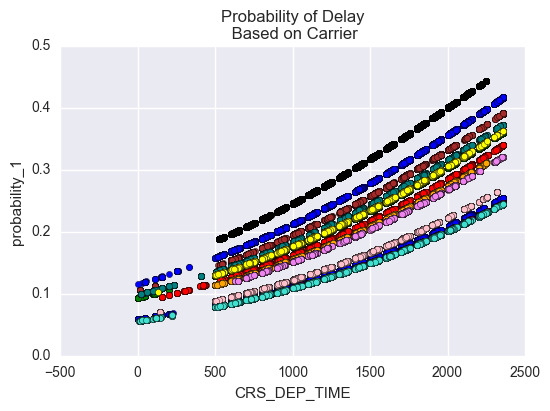

In [88]:
ax = plt.subplot(111)
colors = ['green', 'blue', 'red', 'purple', 'orange', 
          'brown', 'pink', 'black', 'teal', 'yellow', 
          'blue', 'turquoise', 'violet']

# enumerate assigns certain colors to certain values 
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability_1', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Carrier')


In [89]:
# predicts a probability
df['probability_1'] = model.predict_proba(df[features[1:]]).T[0]

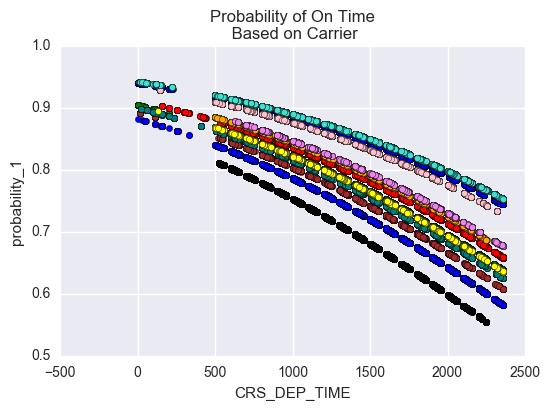

In [90]:
ax = plt.subplot(111)
colors = ['green', 'blue', 'red', 'purple', 'orange', 
          'brown', 'pink', 'black', 'teal', 'yellow', 
          'blue', 'turquoise', 'violet']

# enumerate assigns certain colors to certain values 
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability_1', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of On Time\n Based on Carrier')

In [91]:
# predicts a class
df['probability_1'] = model.predict(df[features[1:]]).T[1]

In [92]:
df['prediction'] = model.predict(df[features[1:]]).T[1]

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [93]:
from sklearn import dummy, metrics

In [94]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]


In [95]:
df.shape

(458311, 41)

[(0, 1),
 (0, 1),

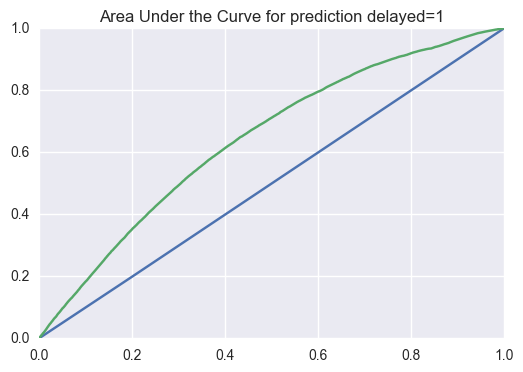

In [96]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

In [97]:
metrics.accuracy_score(df.DEP_DEL15, df.prediction)

0.80149287274361736

#### Visualizing Precision / Recall

In [98]:
metrics.precision_score(df.DEP_DEL15, df.prediction)

0.0

In [99]:
# this is one method making a confusion matrix
# you can also use groupby and the confusion matrix function found in sklearn

import pandas as pd
pd.crosstab(df.DEP_DEL15,df.prediction)

prediction,0.0
DEP_DEL15,
0.0,367333
1.0,90978


In [100]:
print metrics.classification_report(df.DEP_DEL15, df.prediction)

# You want the f1 score to be as close to 1 as possible
# built from a confusion matrix

             precision    recall  f1-score   support

        0.0       0.80      1.00      0.89    367333
        1.0       0.00      0.00      0.00     90978

avg / total       0.64      0.80      0.71    458311



/Users/justinmcelderry/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
# precision = TP / (TP + FP)
# see the deck for confusion matrices for these formulas in more detail
# lowering the threshold makes it easier to predict -- how do you change the threshold??